# Single Layer LSTM

In [9]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [10]:
# Let's install tensorflow 2.x first :)
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  # uncomment next line
  #!pip install tensorflow==2.0.0

In [11]:
try: 
    import tensorflow_datasets as tfds
except Exception:
    !sudo pip install -q tensorflow-datasets
    import tensorflow_datasets as tfds

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
print(tf.__version__)

2.0.0


In [14]:
DATASET_NAME="imdb_reviews/subwords8k"
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 10

In [15]:
# Download the dataset
imdb, info = tfds.load(DATASET_NAME, with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /home/laura/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [16]:
# Split the data. Reference: https://www.tensorflow.org/datasets/splits#s3_slicing_api
train_dataset, test_dataset = imdb['train'], imdb['test']

In [17]:
# Lets get the encoder. Which is a SubwordTextEncoder
# Ref: https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder
tokenizer = info.features['text'].encoder

In [18]:
# Prepare the data for training by adding padding to the training dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Execute training step
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 85s 217ms/step - loss: 0.5300 - accuracy: 0.7301 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 78s 200ms/step - loss: 0.3613 - accuracy: 0.8528 - val_loss: 0.4052 - val_accuracy: 0.8348
Epoch 3/10
391/391 [==============================] - 79s 203ms/step - loss: 0.2869 - accuracy: 0.8888 - val_loss: 0.4357 - val_accuracy: 0.8149
Epoch 4/10
391/391 [==============================] - 79s 203ms/step - loss: 0.2806 - accuracy: 0.8884 - val_loss: 0.5590 - val_accuracy: 0.7393
Epoch 5/10
391/391 [==============================] - 79s 201ms/step - loss: 0.2189 - accuracy: 0.9173 - val_loss: 0.5015 - val_accuracy: 0.8093
Epoch 6/10
391/391 [==============================] - 77s 198ms/step - loss: 0.1602 - accuracy: 0.9412 - val_loss: 0.5500 - val_accuracy: 0.8010
Epoch 7/10
391/391 [==============================] - 78s 199ms/step - loss: 0.1690 - accuracy: 0.9379 - val_loss: 0.5297 

In [23]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

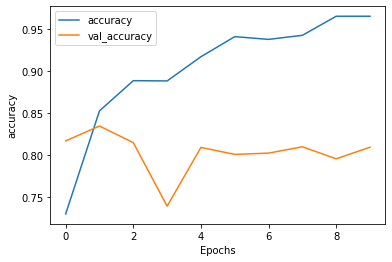

In [24]:
plot_graphs(history, 'accuracy')

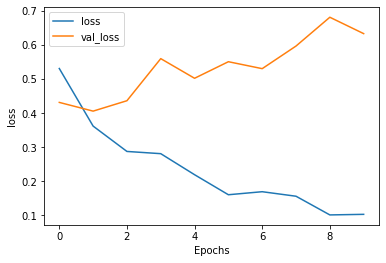

In [25]:
plot_graphs(history, 'loss')

In [26]:
# Close the session 
session.close()